# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_stats_salary_18-19')
wrs.head()

,NAME,TGT,REC,TGT/G,100+ YDS,YDS/REC,TD,LONG,FUM,FUML,...,REC_rank,TGT/G_rank,100+ YDS_rank,YDS/REC_rank,TD_rank,LONG_rank,FUM_rank,FUML_rank,overall,salary
0,Curtis Samuel,65,39,5.0,0,12.7,5,53,1,1,...,64.5,68.0,106.5,70.5,39.5,55.0,95.5,122.0,76.333333,1613421
1,Will Fuller,45,32,6.4,3,15.7,4,73,0,0,...,81.0,35.5,20.0,18.0,57.5,21.0,38.5,54.0,46.388889,2541078
2,Alshon Jeffery,92,65,7.1,2,13.0,6,52,1,0,...,30.0,24.5,32.0,62.5,25.0,57.0,95.5,54.0,46.555556,13000000
3,Martavis Bryant,27,19,3.4,0,14.0,0,47,1,1,...,115.5,100.0,106.5,44.0,139.5,72.0,95.5,122.0,102.277778,1907000
4,Julian Edelman,108,74,9.0,2,11.5,6,36,1,0,...,20.5,11.0,32.0,98.0,25.0,101.0,95.5,54.0,50.944444,5500000


In [3]:
wrs.columns

Index(['NAME', 'TGT', 'REC', 'TGT/G', '100+ YDS', 'YDS/REC', 'TD', 'LONG',
       'FUM', 'FUML', 'TGT_rank', 'REC_rank', 'TGT/G_rank', '100+ YDS_rank',
       'YDS/REC_rank', 'TD_rank', 'LONG_rank', 'FUM_rank', 'FUML_rank',
       'overall', 'salary'],
      dtype='object')

In [4]:
model = LinearRegression()

In [5]:
X = wrs[['TGT', 'REC', 'TGT/G', '100+ YDS', 'YDS/REC', 'TD',
         'LONG', 'FUM', 'FUML']]
y = wrs['salary']

In [6]:
X.shape

(87, 9)

In [7]:
y.shape

(87,)

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = model.predict(X)

In [10]:
def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [11]:
np.sqrt(MSE(y, y_pred))

3559709.6903990605

In [12]:
model.intercept_

1034723.133379329

In [13]:
model.coef_

array([ 7.00795456e+02, -7.99078205e+04,  1.41943362e+06,  8.33831643e+05,
        2.15380450e+05,  2.06763451e+05, -7.48297038e+04,  6.82098967e+05,
       -1.18597581e+06])

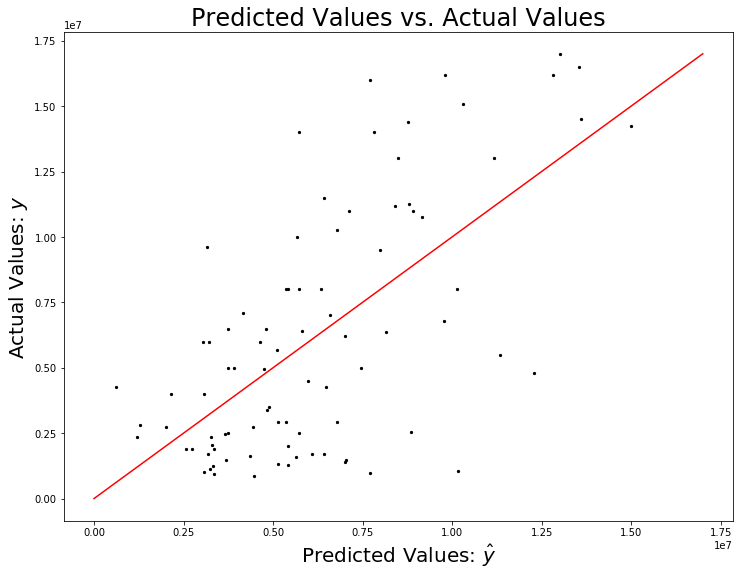

In [14]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [15]:
r2_score(y, y_pred)

0.42643006542139206